### Notebook by [Volkan Sonmez](http://www.pythonicfool.com/)  
### Bitcoin price prediction made with ARIMA and LSTM 
##### [Pythonicfool GitHub Repository](https://github.com/volkansonmez/Exploratory_Data_Analysis_and_ML_Projects)

## Table of contents

1. [Introduction](#Introduction)

2. [Importing Data](#Importing_Data)
    
4. [ARIMA (Auto Integrated Moving Average Model)](#ARIMA)
   
5. [LSTM Model (Long Short Term Memory Model)](#LSTM_Model)

6. [Conclusion](#Conclusion)

## Introduction

[[ go back to the top ]](#Table-of-contents)
    

There are 2 machine learning algorithms used in this notebook to predict Bitcoin future prices. These algorithms are known as ARIMA and LSTM. 

> What is ARIMA?

An ARIMA model is a class of statistical models for analyzing and forecasting time series data. ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average.

> What is LSTM?

The long short-term memory (LSTM) model is an advanced recurrent neural network (RNN) architecture used in the field of deep learning. It has feedback connections. It can process entire sequences of data. The LSTM machine learning model learns a function that maps a sequence of past observations as input to an output observation. 


As a generalization for stock data prediction, ARIMA yields better results in forecasting the short-term, whereas LSTM yields better results for long-term forecasting.

#### Packages needed for building the models:

This notebook uses several Python packages that come standard with the Anaconda Python distribution. 
The primary libraries you need to run this notebook are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **yfinance**: Yahoo financial data library. 

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas matplotlib sklearn yfinance tensorflow pytorch

## Importing_Data 

[[ go back to the top ]](#Table-of-contents)

* You will need: yfinance and datetime modules to import and view the stock data. 
    

In [1]:
# Download these libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Download these additional libraries to access the trading data
from datetime import datetime
import yfinance as yf

end = datetime.now()
print(end)
start = datetime(end.year - 3, end.month, end.day) # last 3 years data
print(start)
# For a cleaner notebook, add these lines below
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

2021-08-30 22:52:50.350240
2018-08-30 00:00:00


[*********************100%***********************]  1 of 1 completed


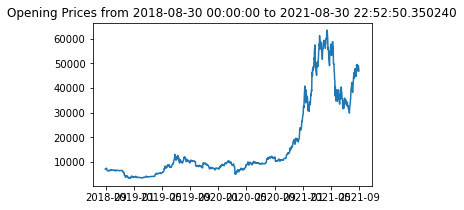

In [2]:
# store the imported data into a variable that holds the dataframe and preview it in a simple chart
df_btc = yf.download('BTC-USD', start = start, end = end)
  
# display
plt.figure(figsize = (5,3))
plt.title('Opening Prices from {} to {}'.format(start, end))
plt.plot(df_btc['Open'])
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1093 entries, 2018-08-30 to 2021-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1093 non-null   float64
 1   High       1093 non-null   float64
 2   Low        1093 non-null   float64
 3   Close      1093 non-null   float64
 4   Adj Close  1093 non-null   float64
 5   Volume     1093 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 59.8 KB
None


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-30,7043.759766,7072.689941,6834.689941,6978.229980,6978.229980,4463250000
2018-08-31,6973.970215,7057.169922,6920.160156,7037.580078,7037.580078,4495650000
2018-09-01,7044.810059,7242.290039,7038.049805,7193.250000,7193.250000,4116050000
2018-09-02,7189.580078,7306.310059,7132.160156,7272.720215,7272.720215,4329540000
2018-09-03,7279.029785,7317.939941,7208.149902,7260.060059,7260.060059,4087760000
...,...,...,...,...,...,...
2021-08-16,47019.960938,47998.097656,45700.320312,46004.484375,46004.484375,32776876610
2021-08-17,45936.457031,47139.570312,44512.417969,44695.359375,44695.359375,33451362600
2021-08-18,44686.750000,45952.062500,44364.027344,44801.187500,44801.187500,32194123075


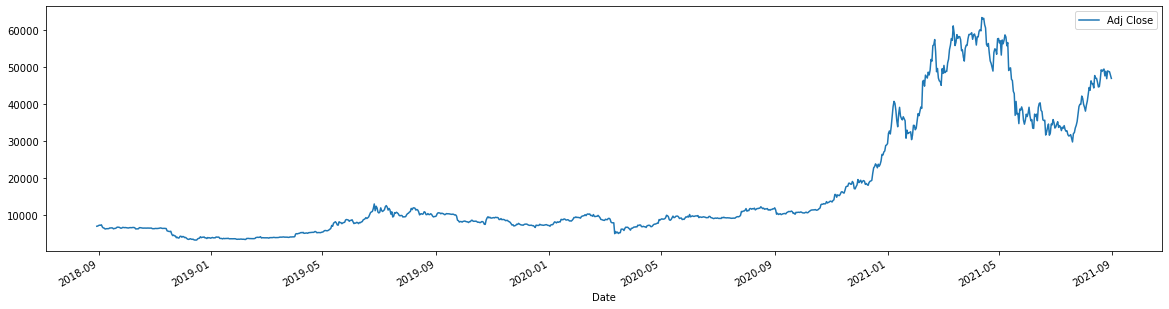

In [3]:
# View the properties of the dataframe

print(df_btc.info())
df_btc.plot(x= None, y='Adj Close', legend=True, figsize=(20,5)) 
df_btc[:-10]

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1093 entries, 2018-08-30 to 2021-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1093 non-null   float64
 1   High       1093 non-null   float64
 2   Low        1093 non-null   float64
 3   Close      1093 non-null   float64
 4   Adj Close  1093 non-null   float64
 5   Volume     1093 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 59.8 KB
None


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-26,3228.747314,3249.655273,3060.228760,3100.325439,3100.325439,17405668117
2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004
2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698
2021-08-29,3246.770996,3283.235596,3158.840332,3227.002686,3227.002686,13296586731
2021-08-31,3219.034424,3246.236328,3199.930176,3223.364502,3223.364502,19802480640


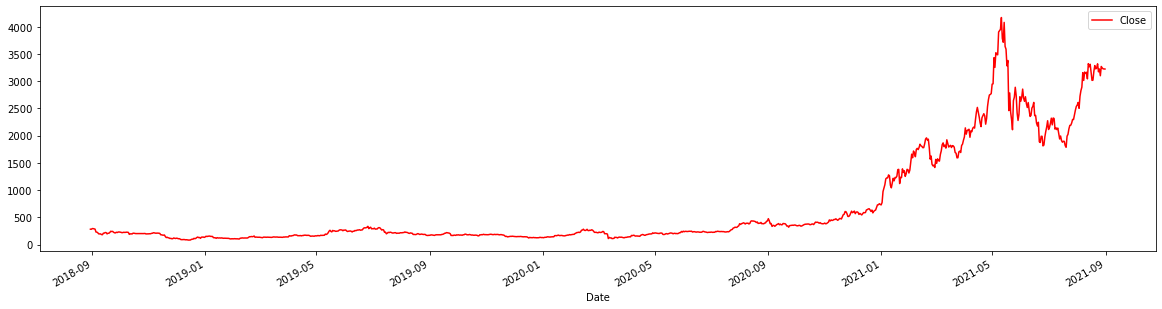

In [4]:
# BONUS:
# Repeat the same procedure for the Ethereum's price chart to visualize both Bitcoin and Ethereum prices together

ETH = yf.download('ETH-USD', start = start, end = end)
df_eth = pd.DataFrame(ETH)
df_eth.plot(x= None, y= 'Close',legend=True, figsize=(20,5), color = 'red') # view the data
print(df_eth.info())
df_eth.tail()

starting value for BTC-USD 6978.22998046875 starting value for ETH-USD 284.1050109863281


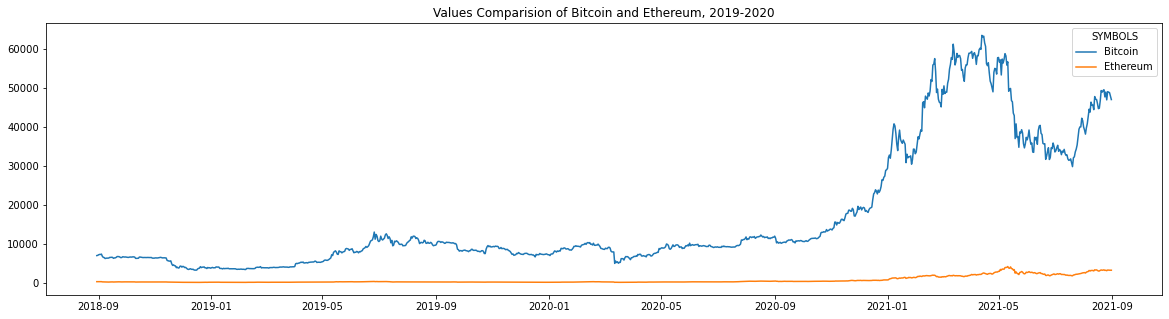

In [5]:
# Create two plots on the same frame to visualize both Bitcoin and Ethereum prices together.

# Compare these two stock closing values based on their 5 year performance
x = df_eth.index[:] 
y1 = df_btc['Adj Close'][:]
y2 = df_eth['Adj Close'][:]
plt.figure(figsize=(20,5))
plt.plot(x,y1,label="Bitcoin", )
plt.plot(x,y2,label="Ethereum")
plt.title("Values Comparision of Bitcoin and Ethereum, 2019-2020")
plt.legend(title="SYMBOLS")
print('starting value for BTC-USD', y1[0], 'starting value for ETH-USD', y2[0])
plt.show()

The chart does not show a well-adjusted value comparison. 

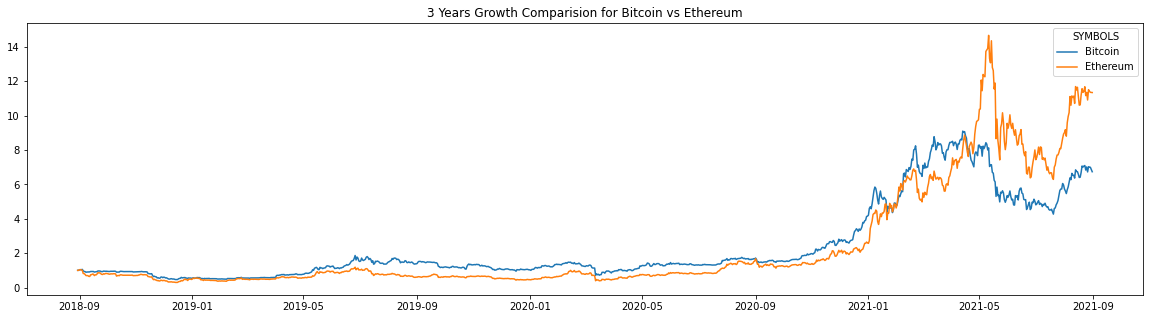

In [6]:
# match the starting point of the crypto values to 1 dollar to compare their growth rate. 

readjusted_y1 = 1/y1[0] * y1
readjusted_y2 = 1/y2[0] * y2

plt.figure(figsize=(20,5))
plt.plot(x,readjusted_y1,label="Bitcoin", )
plt.plot(x,readjusted_y2,label="Ethereum")
plt.title("3 Years Growth Comparision for Bitcoin vs Ethereum")
plt.legend(title="SYMBOLS")
# print('Assuming initial investment for BTC-USD is', readjusted_y1[0], 'and for ETH-USD is', readjusted_y2[0])
plt.show()

The chart above shows both cryptos' values over the last 3 years with their starting price as 1 dollar (as if your initial investment was 1 dollar) 

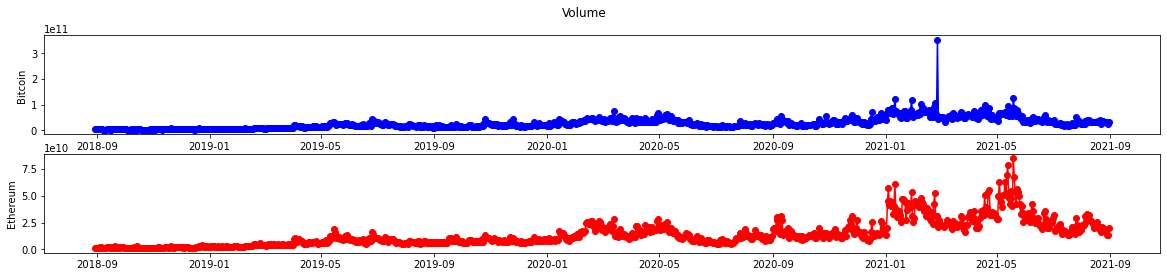

In [7]:
# View the trading volumes  

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Volume')
fig.set_figwidth(20)

ax1.plot(df_btc.index, df_btc['Volume'], 'o-', color = 'blue')
ax1.set_ylabel('Bitcoin')

ax2.plot(df_eth.index, df_eth['Volume'], 'o-', color = 'red')
ax2.set_ylabel('Ethereum')

plt.show()

The trading volume of Ethereum is larger than Bitcoin

## ARIMA

[[ go back to the top ]](#Table-of-contents)

To be able to do a prediction on stocks or crypto data with the ARIMA model, we need to manipulate the data until we get some kind of a stationary pattern. A weekly, monthly, quarterly moving average of the data will usually show a stationary pattern. 

Most raw financial data of stock values or crypto prices have high p-values (high p-value means very highly volatile non-stationary data with an unpredictable pattern). If the p-value of the data is observed greater than 0.05, the time series is non-stationary. If the p-value of the data is high, create a new dataset that holds a moving average of a specific time frame. This will allow a prediction on a stationary pattern. 

The Augmented Dickey-Fuller test (ADF test) is a common statistical test used to test whether a given time series is stationary or not. Use this test to check the p-values of the raw data and the moving average data. 

In [8]:
# Run an ARIMA model for prediction of Bitcoin's future prices

# Check if the data is already stationary
from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(y1, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -0.3055449996626633
n_lags: 0.9247153145701461
p-value: 0.9247153145701461
Critial Values:
   1%, -3.436419361753321
Critial Values:
   5%, -2.864219865461312
Critial Values:
   10%, -2.5681968527091907


The data is highly non-stationary, we need to make it stationary by extracting patterns to feed it into a model. 

Most people try quarterly, weekly shifts as well. There is no great rule of thumb shift value for ANY STOCK/CRYPTO PRICE!

To predict future values with ARIMA model, the p-value of the data needs to be below 0.05. 

This data is NOT showing an exponential pattern. So, the log transformation of the data would punish the good results too much. It is also certainly NOT seasonal data. Therefore, seasonal transformation is NOT an option. Out of the 3 well-known options which are: Differencing, Seasonal Differencing, and Transformation, "differencing" is the best option for working on this dataset. Shifting the original data into a monthly pattern would be a reasonable approach. 

ADF Statistic: -3.468834946169668
n_lags: 0.008824494627148434
p-value: 0.008824494627148434
Critial Values:
   1%, -3.436419361753321
Critial Values:
   5%, -2.864219865461312
Critial Values:
   10%, -2.5681968527091907


Date
2018-09-29   -376.270020
2018-09-30   -412.020020
2018-10-01   -603.629883
2018-10-02   -716.620117
2018-10-03   -757.470215
Name: Adj Close, dtype: float64

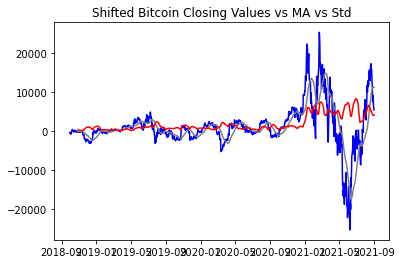

In [9]:
# Move the data's p value to below 0.05 by taking the 30 day average so that stationary values can be obtained. 

df_btc_new = y1.copy()
# Smooth the data with the mean of 30 instances with a sliding window
shifted_df_btc_new = df_btc_new.shift(30)
df_btc_new = df_btc_new - shifted_df_btc_new
df_btc_new.dropna(inplace=True) # get rid of the none values

ma_new = df_btc_new.rolling(window=30).mean() # new data moving averege mean
ma_new.dropna(inplace=True)
std_new = df_btc_new.rolling(window=30).std() # new data std 
std_new.dropna(inplace=True)

# view the chart 
plt.title("Shifted Bitcoin Closing Values vs MA vs Std")
plt.plot(df_btc_new, color = 'blue', )
plt.plot(ma_new, color = 'grey')
plt.plot(std_new, color = 'red')

# After shifting the data 30 days, we have a pattern that would work better for ARIMA model. 
# df_btc_new.plot(x = None, y = 'y', figsize=(20,5), color = 'blue' )

# ADF Test Again
result_log = adfuller(df_btc_new, autolag='AIC')
print(f'ADF Statistic: {result_log[0]}')
print(f'n_lags: {result_log[1]}')
print(f'p-value: {result_log[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

# p value is now below 0.05 so we can feed this new shifted data to the ARIMA model.
df_btc_new.head()

Auto Regressive Integrated Moving Average Model is made of: (AR(Auto Regressive) + MA(Moving Average))

ACF (Auto Correlation Function) & PACF (Partial Auto Correlation Function) graphs are used to find Q & P values. P value is showing auto regressive lags and Q value is showing moving average.  

This is how to get the Q, D & P parameters of ARIMA traditionally: 
* From PACF (at y=0) we get P value. 
* From ACF (at y=0) we get Q value. 
* D value is the order of differentiation. 

In [10]:
# Import ARIMA: 

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from statsmodels.tsa.arima_model import ARIMA

# Try grid search for best P, D, Q parameters since this time series is too hard for getting the right params.
p_values = range(1, 12)
d_values = range(0, 3)
q_values = range(0, 3)

# Split the data into the train and test sets
# intentionally allocating a large portion to the training data since values seem too volitile the last 3 months. 
index = int(len(df_btc_new) * 0.90) 
train_data = df_btc_new[:index]
test_data = df_btc_new[index:]

# Write a simple function to calculate the mean square error between the testing set and trained model forecast
from sklearn.metrics import mean_squared_error

def run_ARIMA(train, test, p, d, q):
    order = (p,d,q)
    model = ARIMA(train, order) # this is how the model is fit 
    model_fit = model.fit(disp=0)
    fc, se, conf = model_fit.forecast(len(test))
    fc = np.array(fc)
    test = np.array(test)
    total_error = mean_squared_error(test, fc)
    return total_error
 
    
# Do a grid search on the best parameters to find the minimum error between the training and testing datasets
min_error = np.inf 
best_params = None
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                error = run_ARIMA(train_data, test_data, p, d, q)
                if error < min_error:
                    min_error = error
                    best_p = p
                    best_d = d
                    best_q = q
            except:
                continue

print('Best ARIMA parameters are: ' , best_p, best_d, best_q)


Best ARIMA parameters are:  11 0 1


In [11]:
# View the model with the best parameters and fit them into the model.

model = ARIMA(df_btc_new, order = (best_p, best_d, best_q))  
fitted = model.fit(disp = -1)  

# Make a forecast based on the tweaked (shifted) data
fc, se, conf = fitted.forecast(30, alpha=0.05)  # 95% confidence level

print(len(fc), fc[:5], se[:5], conf[:5]) 

30 [4901.58117852 4560.43710058 4436.73205641 4380.72067733 3392.27340941] [1298.10669807 1730.30545726 2145.42495799 2451.01313939 2696.60371907] [[ 2357.33880221  7445.82355483]
 [ 1169.1007221   7951.77347907]
 [  231.77640722  8641.6877056 ]
 [ -423.1768015   9184.61815616]
 [-1892.97276054  8677.51957936]]


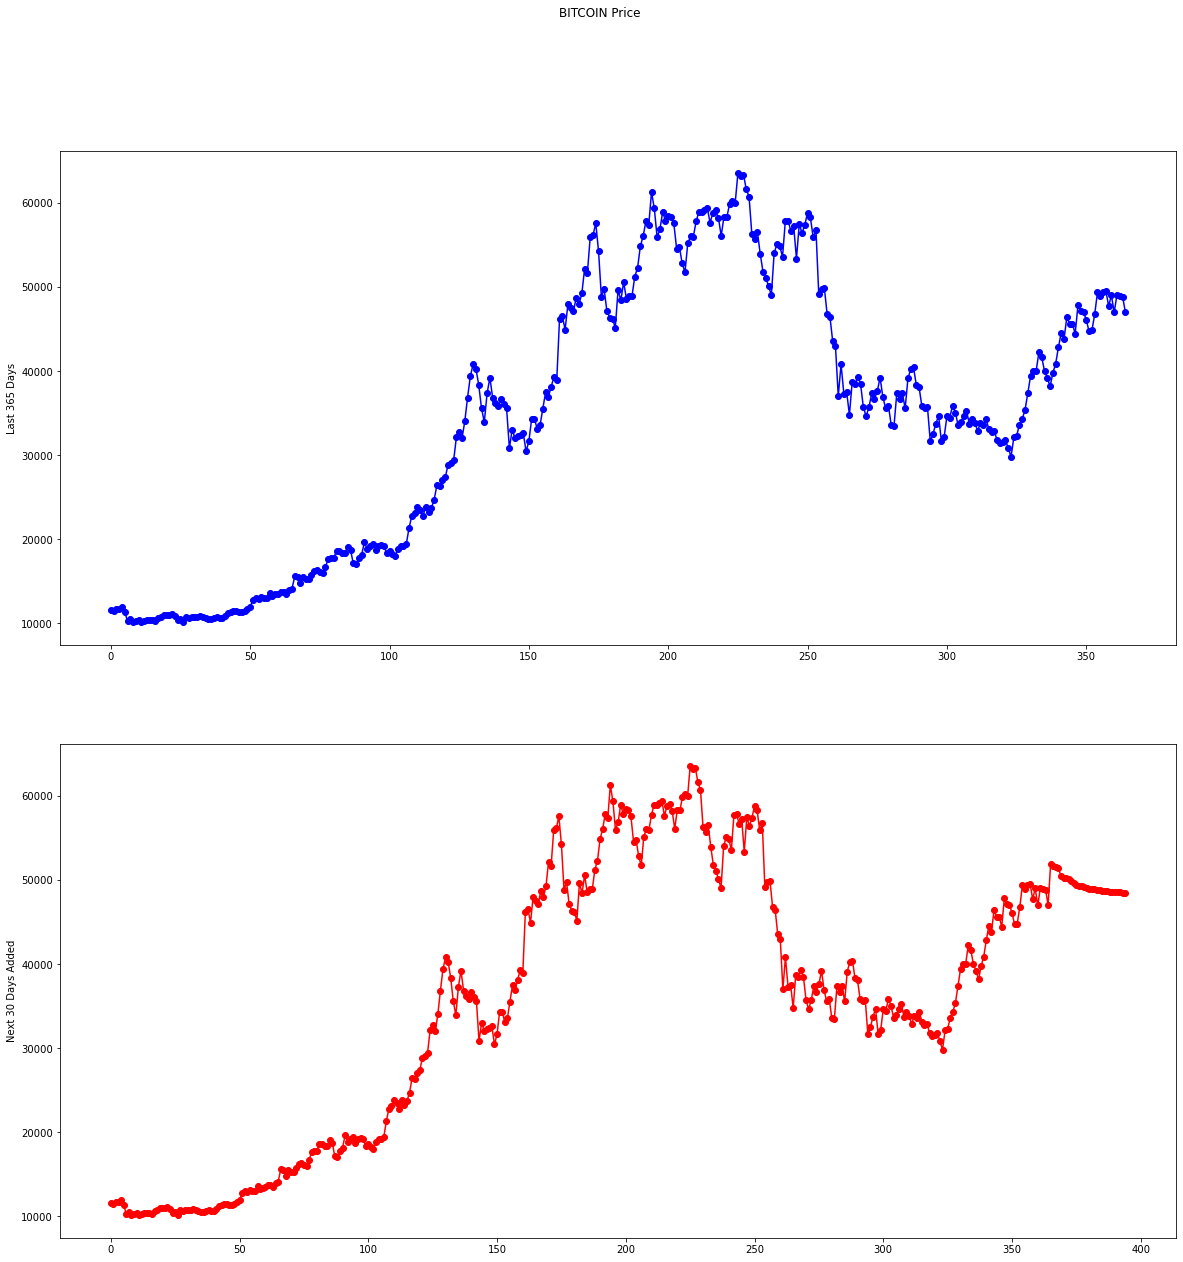

In [12]:
# Convert the forecast to pandas series and view the last year's actual data and the next 30 days projection

fc_series = np.array(fc) 
data_last_year = np.array(df_btc['Adj Close'][-365:])
fc_series += data_last_year[-1] # start from the last day
data_with_fc = []
for i in range(len(data_last_year)):
    data_with_fc.append(data_last_year[i])
for i in range(len(fc_series)):
    data_with_fc.append(fc_series[i])

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('BITCOIN Price')
fig.set_figwidth(20)
fig.set_figheight(20)

ax1.plot(data_last_year, 'o-', color = 'blue')
ax1.set_ylabel('Last 365 Days')

ax2.plot(data_with_fc, 'o-', color = 'red')
ax2.set_ylabel('Next 30 Days Added')
plt.show()

The chart shows a prediction of an ARIMA model for the next 30 days based on a 30 day moving average integrated model for bitcoin prices. It is showing a large error (about a 5% shift with a vertical line) in the chart since the predicted values do not start from the last day's value in the dataset. It is also a very costly procedure. We will skip following the same procedure for predicting the ETH prices. Let's move on to another model. 

## LSTM_Model
[[ go back to the top ]](#Table-of-contents)

Create a Keras LSTM Model and train it with BITCOIN price data

In [13]:
dataset = df_btc['Adj Close'].values
print(dataset[:-10])
# Convert the dataframe to a numpy array
dataset = np.array(dataset)
dataset = dataset[:,np.newaxis]
# Get the number of rows to train the model on
split_index = int(len(dataset) * 0.8)
print(split_index)
print(dataset.shape)


[ 6978.22998047  7037.58007812  7193.25       ... 44801.1875
 46717.578125   49339.17578125]
874
(1093, 1)


In [14]:
# Scale the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data[:5], scaled_data[-5:])

[[0.06208186]
 [0.06306665]
 [0.06564966]
 [0.06696831]
 [0.06675824]] [[0.72520082]
 [0.76031888]
 [0.75772598]
 [0.75652182]
 [0.72655677]]


In [15]:
# Create your own target, based on the time series. 
# In this notebook, the targets are chosen for the previous 30 days values.

def create_LSTM_dataset(dataset):
    x_dataset = []
    y_dataset = []
    # start from the 30th day since we are more interested in the later data 
    for i in range(30, len(dataset)):
        x_dataset.append(dataset[i-30:i])
        y_dataset.append(dataset[i])
    # for the first 30 days, only insert the average of the first 30 days as they are. 
    # LSTM will forget them eventually so no need for taking the 
    # average or weighted averages of smaller time periods
    # first_30_days = dataset[:30]
    return np.array(x_dataset), np.array(y_dataset)

x, y = create_LSTM_dataset(scaled_data)
# print(x[0], y[0])
print(x.shape, y.shape)  # LSTM requires a dataset with 3 dimensions.

(1063, 30, 1) (1063, 1)


In [16]:
# Do the split for training and test sets

split_index = int(len(scaled_data) * 0.85)
trainX, testX = x[:split_index], x[split_index:]
trainY, testY = y[:split_index] , y[split_index:]
print(trainX.shape, trainY.shape, testX.shape, testY.shape)
# print(testX[0], testY[0])

(929, 30, 1) (929, 1) (134, 30, 1) (134, 1)


In [17]:
# Create the model with Keras 

from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (trainX.shape[1], trainX.shape[2])))
model.add(LSTM(100, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 100)           40800     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                2525      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [18]:
# train the model

model.fit(x = trainX, y = trainY, validation_data = (testX, testY), epochs = 5, batch_size = 30, verbose = True) 


Train on 929 samples, validate on 134 samples
Epoch 1/5
929/929 [==============================] - 4s 4ms/step - loss: 0.0081 - val_loss: 0.0123
Epoch 2/5
929/929 [==============================] - 3s 3ms/step - loss: 9.4427e-04 - val_loss: 0.0066
Epoch 3/5
929/929 [==============================] - 3s 3ms/step - loss: 7.3253e-04 - val_loss: 0.0061
Epoch 4/5
929/929 [==============================] - 2s 2ms/step - loss: 6.8714e-04 - val_loss: 0.0087
Epoch 5/5
929/929 [==============================] - 2s 2ms/step - loss: 6.8678e-04 - val_loss: 0.0048


Since the loss is quite small, there is no need to increase epoch size and overfit the data into the model.

In [19]:
# do a prediction with the test set

test_predictions = model.predict(testX)
print(test_predictions[:5])
predictions = scaler.inverse_transform(test_predictions)
print(predictions[:5])

[[0.96421564]
 [0.95782197]
 [0.9500153 ]
 [0.93928885]
 [0.92534643]]
[[61346.855]
 [60961.53 ]
 [60491.047]
 [59844.598]
 [59004.332]]


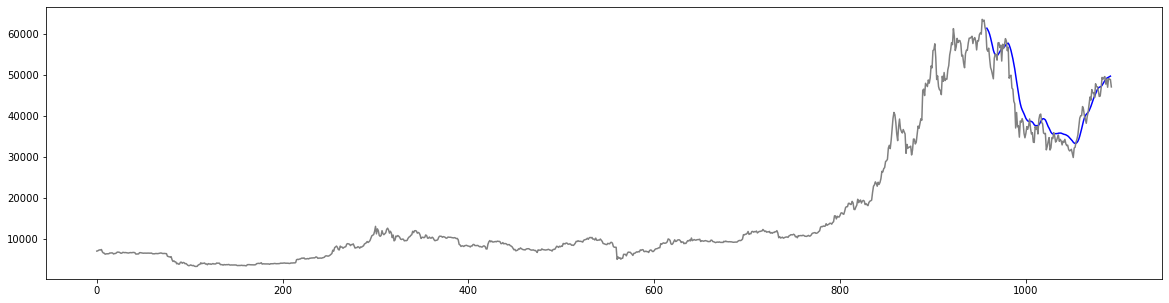

In [20]:
# Visualize both the actual data (gray line) and predictions on the test set (blue line)

concat = []
# shift the starting point all the way to the end of the chart
for i in range(len(trainX) + 29):
    concat.append(None)
for i in range(len(predictions)):
    concat.append(predictions[i])

plt.figure(figsize = (20,5))
plt.plot(concat, color = 'blue')
plt.plot(dataset, color = 'gray')

The predictions follow the actual pattern

(1063, 30, 1)
(7, 30, 1)
[49653.727]


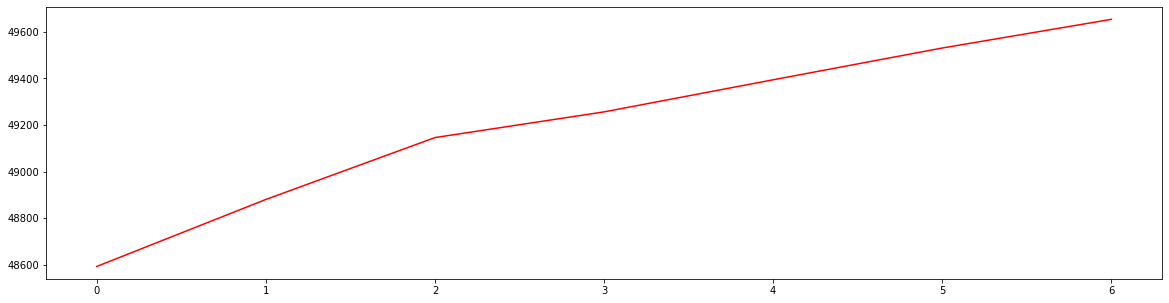

In [21]:
# this is not going to be very realistic but let's make a prediction for the next 7 days.

print(x.shape)
x_last_month = x[-7:, :, :]  #  arr[np.newaxis, :] 
print(x_last_month.shape)
next_month_prediction = model.predict(x_last_month)
prediction = scaler.inverse_transform(next_month_prediction)
plt.figure(figsize = (20,5))
plt.plot(prediction, color = 'red')

print(prediction[-1]) # where it is headed to the next 30 days

#### Bonus: Create the same sequential model with pytorch if you like instead of Keras. It will be the same outcome. 
    import torch
    import torch.nn as nn

    # Reminder: np.array does not work with pytorch, data structure has to be a tensor before they are fed into the model.
    trainY = torch.Tensor(trainY) 
    trainX = torch.Tensor(trainX)
    print(trainY.shape, trainX.shape)

    class LSTM(nn.Module):
        def __init__(self, input_size=30, hidden_layer_size=50, output_size=1):
            super().__init__()
            self.hidden_layer_size = hidden_layer_size

            self.lstm = nn.LSTM(input_size, hidden_layer_size)

            self.linear = nn.Linear(hidden_layer_size, output_size)

            self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                                torch.zeros(1,1,self.hidden_layer_size))

        def forward(self, input_seq):
            lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
            predictions = self.linear(lstm_out.view(len(input_seq), -1))
            return predictions[-1]

    model = LSTM()
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    print(model)

## Conclusion

[[ go back to the top ]](#Table-of-contents)

This notebook was made to teach two basic prediction modeling using bitcoin prices for beginner machine learning students. The ARIMA (statistical) model was built on monthly moving average data since the raw data was not stationary. The LSTM (deep learning) model was easy, fast, and cheap to build. Both of them have their error-prone building blocks and need fine-tuning with more complex architectures to making predictions with higher accuracy.  